This code has been prouced as a teaching resource for the UKSA space software, data and AI course run by the Space South Central Universities.

Contributors to this code includes: X. Morice-Atkinson; C. Pattison; S. Youles; B. Canning

### Learning Outcome
<div class="alert alert-block alert-info"> 
<b>NOTE</b> Dealing with the data is one of hardest parts of any data science application. In this notebook we will focus on this first part fo a ML algorithm. We will learn:
    <li>How to read in data</li>
    <li>How and why to augment your datasets</li>
    <li>'Batch' augmenting a dataset</li>
</div>

# Data Augmentation

In this notebook, we will use PyTorch to transform and augment an image.

Transformations and augmentations can be used for training or inference of tasks such as image classification, detection, and segmentation; and video classification.

### **Tasks covered in this notebook**

1. Loading images:
  * Load image locally to a google drive - read only on cluster
  * Load an image by mounting a google drive - read only on cluster
  * Load an image from your computer
4. Augment our dataset using multiple techniques:
  * Resize an image
  * Flip an image vertically and horizontally
  * Change the brightness, contrast, saturation and hue of an image
  * Crop an image
  * Rotate an image
  * Normalise an image

4. 'Batch' augment our data, to process all of our images in one go.

Let's start!

### Import the modules

In [15]:
!pip install opencv-python
import sys
sys.path.append('/opt/conda/lib/python3.11/site-packages')

In [18]:
# ML packages
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
# Plotting packages
import cv2 # for displaying images in colab
### NOTE # cv2.imshow does not work properly in colab
#from google.colab.patches import cv2_imshow # import this if on google colab
from PIL import Image
from matplotlib import pyplot as plt
# Misc
import requests
import os
#from google.colab import drive
import zipfile

### 1. Loading images

The following code can be used to upload an image or images from your local pc or from a goggle drive. 

Two methods are shown using opencv. One simply opens an image from your computer and then other (commented out version) would open a 'Browse' button, to allow you to choose image(s) from your file system. It will then display the first image in the list. However this latter version will only work on colab. 

The third methos shown - also commented out will link a google drive and open your image from there. 

In [54]:
### Method 1
test_image_path = '/home/jovyan/data/Tutorial_data/iris-computer-vision/iris-virginica'
print(test_image_path)
my_image = cv2.imread(test_image_path)

/home/jovyan/data/Tutorial_data/iris-computer-vision/iris-virginica


In [55]:
### Method 2
### The code below will upload an image from your pc to google colab
### This won't work on our cluster but you can try ti yourself on colab

# import cv2
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

#   # Display the first uploaded image
#   my_image = cv2.imread(fn)
#   # cv2 stores images in BGR format rather than RGB, so we need to invert the colors
#   my_image = my_image[:, :, ::-1]
#   plt.imshow(my_image)
#   plt.show()
#   break

For 'method 3' to upload some images from Google Drive you will need to mount the Drive and follow the pop-up instructions after running the following cell to connect to Google Drive.

In [56]:
### Load from Google Drive instead. Follow pop-up instructions after running this cell to connect to Google Drive
#drive.mount('/content/drive')

 Next we define the path to a folder on the shared drive that contains several images of irises.

In [57]:
#test_image_path = "/home/jovyan/data/Tutorial_data/iris-computer-vision/iris-virginica"
#print(test_image_path)

Here, we define and run a function to choose a random image from the Google Drive folder and display it in the notebook.

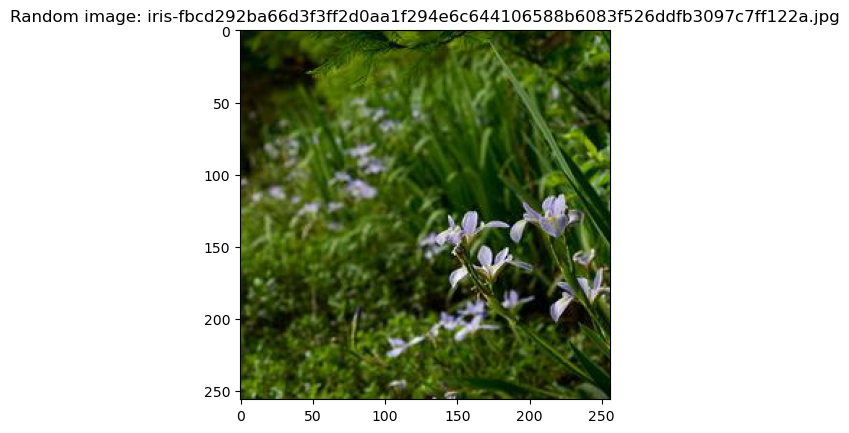

In [58]:
# load a random iris image to use as an example to show data augmentation

import random
import matplotlib.image as mpimg

def load_and_show_random_image(folder_path):

  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  if not image_files:
    print(f"No image files found in {folder_path}")
    return

  random_image_file = random.choice(image_files)
  image_path = os.path.join(folder_path, random_image_file)

  try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f"Random image: {random_image_file}")
    plt.show()
  except Exception as e:
    print(f"Error loading or displaying image: {e}")


load_and_show_random_image(test_image_path)

It can be useful to break up the load and show functions, so we now define the two functions separately

In [59]:
def Show_Image(image, title):
    if not isinstance(image, Image.Image):  # If not a PIL image, convert it
        image = transforms.ToPILImage()(image)

    plt.figure()
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [60]:
def load_random_image(folder_path):

  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  if not image_files:
    print(f"No image files found in {folder_path}")
    return

  random_image_file = random.choice(image_files)
  image_path = os.path.join(folder_path, random_image_file)

  try:
    img = mpimg.imread(image_path)
  except Exception as e:
    print(f"Error loading or displaying image: {e}")
    return None

  return img


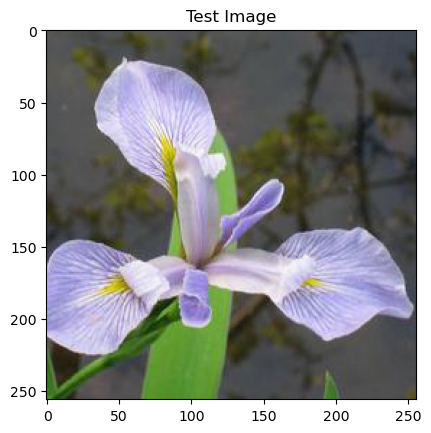

In [61]:
my_image = load_random_image(test_image_path)
Show_Image(my_image, 'Test Image')

### 4. Transform the image

First, let's resize the image to 100 x 100 pixels, and display it alongside the original.


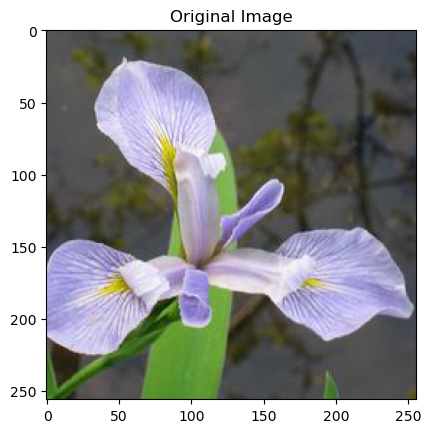

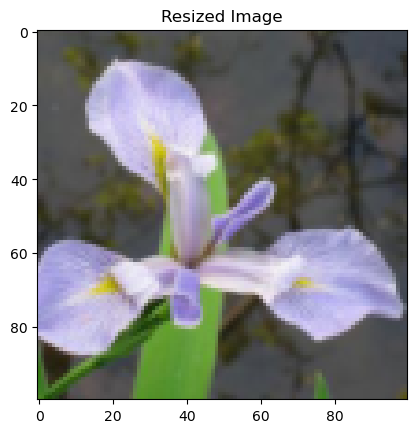

In [62]:
# Resize transformation
Resize_Transformation = transforms.Compose([
   transforms.ToPILImage(),
   transforms.Resize(size=(100)),
   ])

Resized_Img = Resize_Transformation(my_image)

# Display images
Show_Image(my_image, 'Original Image')
Show_Image(Resized_Img, 'Resized Image')

Let's flip the image horizontally in a random fashion with a given probability.

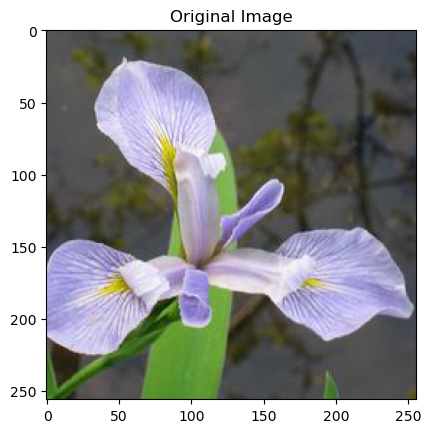

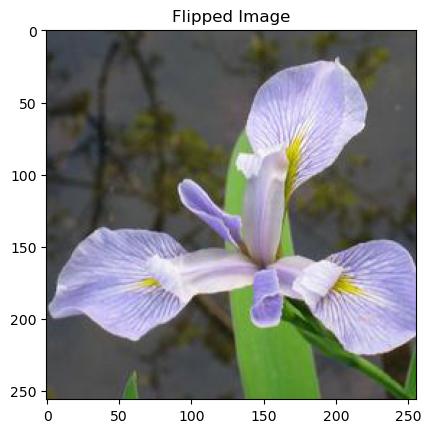

In [63]:
'''
flip an image horizontally in a random fashion with a given probability p
If p = 1, it returns a horizontally flipped image.
If p = 0, It returns the original image.
If p is in the range (0,1), then the probability to return the horizontally flipped image is p.
'''
Horizontal_Flipping_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1)
])

# Display original image plus the transformed image
Flipping_Img = Horizontal_Flipping_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Flipping_Img, 'Flipped Image')

Now, let's flip the image vertically in the same way.

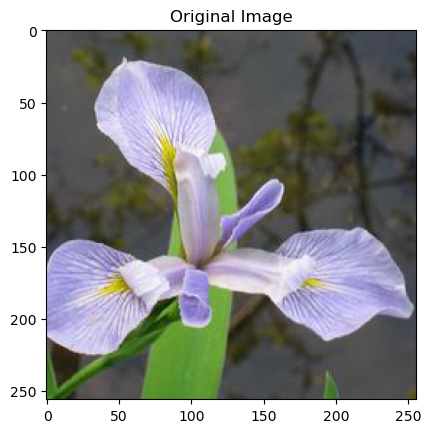

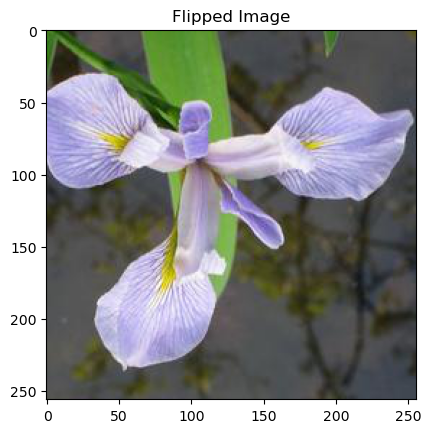

In [64]:
'''
flip an image Vertically in a random fashion with a given probability p
If p = 1, it returns a Vertically flipped image.
If p = 0, It returns the original image.
If p is in the range (0,1), then the probability to return the Vertically flipped image is p.
'''
Vertical_Flipping_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(p=1)
])

# Display original image plus the transformed image
Flipping_Img = Vertical_Flipping_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Flipping_Img, 'Flipped Image')

Now, we randomly change the brightness, contrast, saturation and hue of the image. You can learn more about brightness, contrast, etc, here: https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html

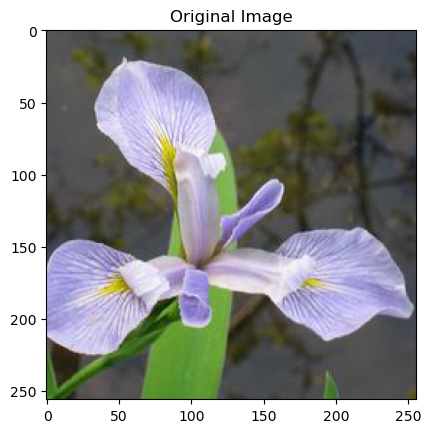

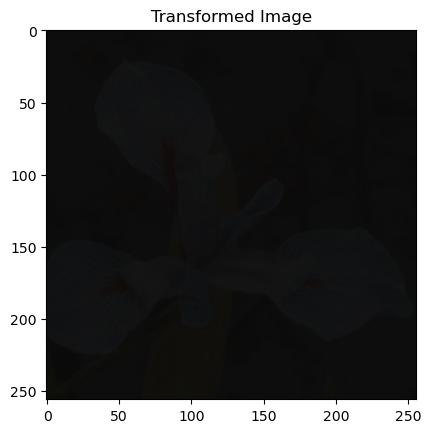

In [65]:
#  Change the brightness, contrast, saturation and hue of an image
Color_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=(0.1,0.6), contrast=1,saturation=0, hue=0.4)
])

# Display original image plus the transformed image
Transformed_Img = Color_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Transformed_Img, 'Transformed Image')

Let's crop the image at a random location with a given size. Note that if we enter only one number for the size, the resulting image will be square.

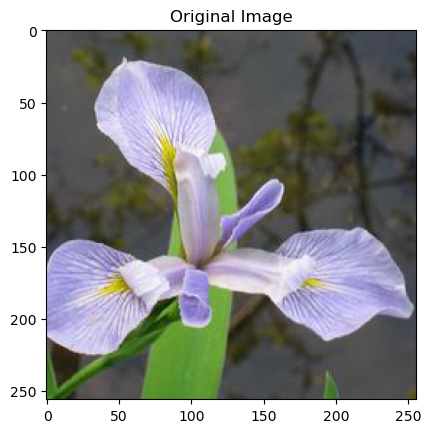

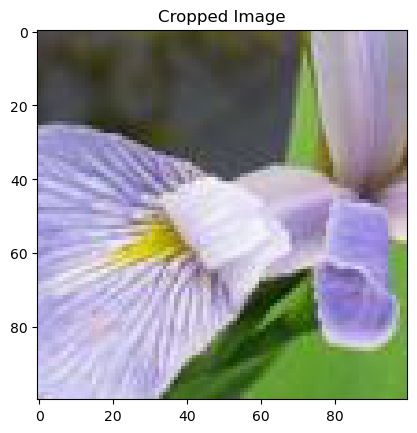

In [66]:
# crop an image at a random location
Crop_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(size=(100,100))
])

# Display original image plus the transformed image
Cropped_Img = Crop_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Cropped_Img, 'Cropped Image')

Now, we rotate the image by a given angle.

The 'degrees' parameter is the range of degrees to select from,
If degrees is a single number instead of sequence indicating (min, max), the range of degrees will be (-degrees, +degrees).

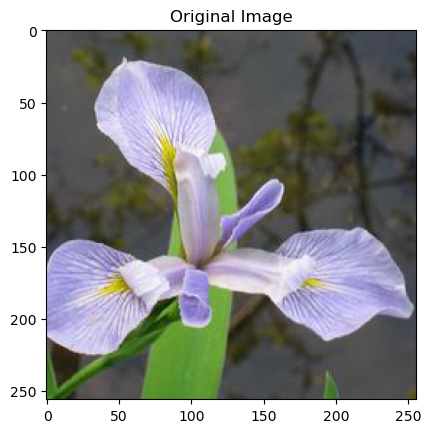

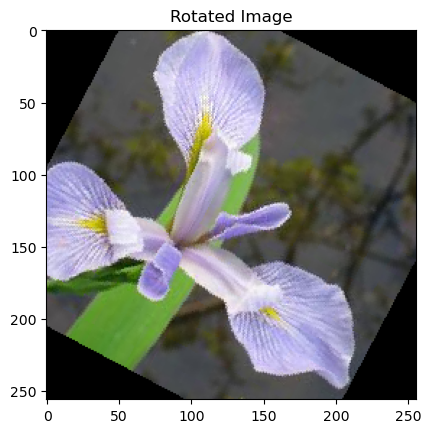

In [67]:

 # Rotate the image by angle.
# 'degrees' parameter is a range of degrees to select from,
# if degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).

Rotate_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=(-66,66))
])

# Display original image plus the transformed image
Rotated_Img = Rotate_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Rotated_Img, 'Rotated Image')

## Normalization
Normalization modifies the data of each channel so that the mean is zero and the standard deviation is one. This is an important step in machine learning for two reasons:
 * it puts data in the same range (0 - 1) as activation functions, resulting in fewer non-zero gradients, and faster learning
 * giving each channel the same distribution ensures that information can be mixed and updated during back propagation at the same learning rate.

We will now normalize our image with the mean and standard deviation (std).

This transform does not support PIL Image, so we will need to convert our image first to PIL format, then into a tensor.

Note that we have 3 values for mean and std because we need these values for each of the 3 channels of our image.

The equation applied is (pixel_value - channel_mean / channel_std)

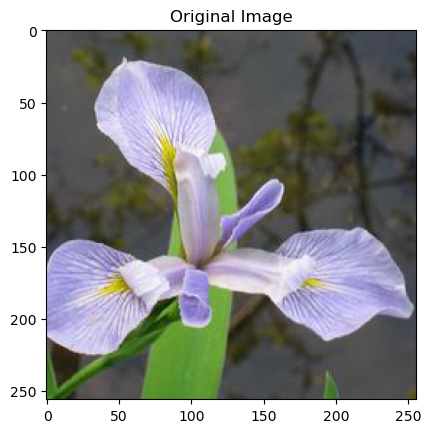

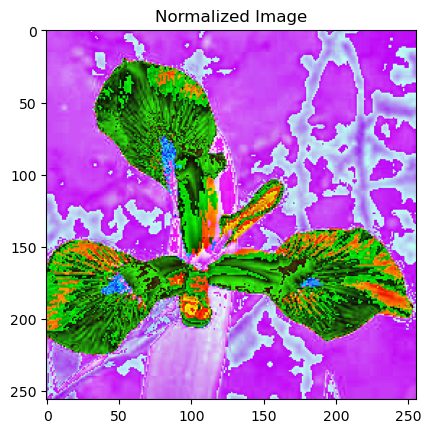

In [68]:
# Normalize the 3 channels of a tensor image with mean and standard deviation.

Normalize_Transformation = transforms.Compose([
    transforms.ToPILImage(),# convert img to PIL format
    transforms.ToTensor(),# convert PIL img to tensor
    transforms.Normalize(mean=[5,0.9,0.6], std=[1.45,0.21,7.12]),
    transforms.ToPILImage()# after normalize we convert back to PIL
])

# Display original image plus the transformed image
Normalized_Img = Normalize_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Normalized_Img, 'Normalized Image')

Let's define a path to a folder of image folders. The ImageFolder function from torch we will use later needs to be pointed to where the folders live, not the images themselves.

In [69]:
# define a path to a folder of image folders
test_images_path = "/home/jovyan/data/Tutorial_data/iris-computer-vision/"
print(test_images_path)

/home/jovyan/data/Tutorial_data/iris-computer-vision/


### 4. 'Batch' augment our data, to process all of our images in one go.

We will perform all of the random augmentations we did before in one code block.

In [70]:
# We can write code to augment all of our images in one go, performing each action randomly.

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define data augmentation transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a consistent size
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.RandomRotation(60),  # Randomly rotate by up to 60 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Adjust color
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the dataset using ImageFolder
dataset = ImageFolder(root=test_images_path, transform=transform)

# Create a DataLoader to iterate through the dataset in batches
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..1.7685405].


torch.Size([4, 3, 256, 256])


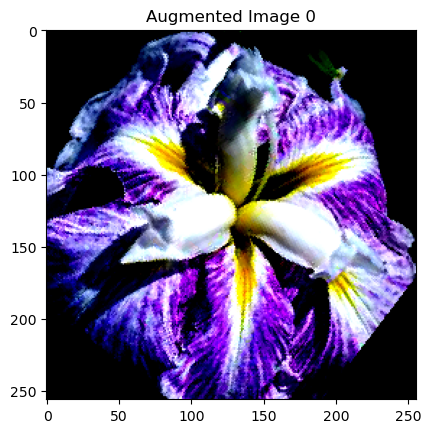

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3959913].


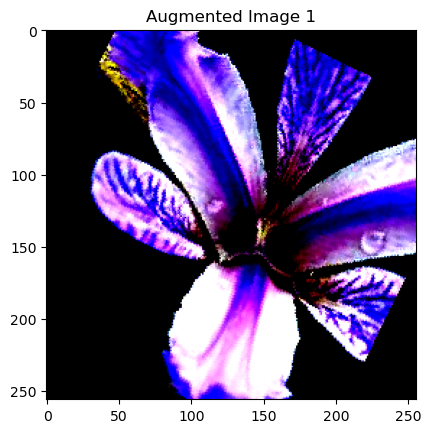

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9124069..2.4308496].


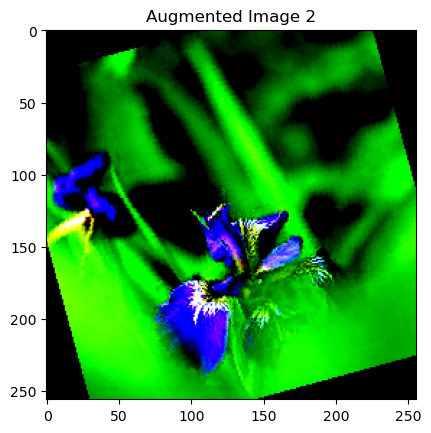

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9295317..1.4896734].


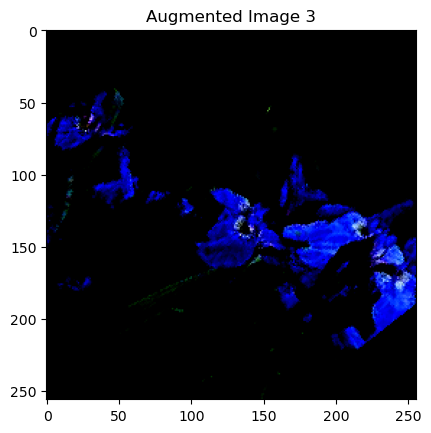

In [71]:
# Plot some of the augmented images

# Iterate through the dataloader and access augmented images
for images, labels in dataloader:
    # Process the augmented images and labels here
    print(images.shape)  # Print the shape of the augmented image batch
    # Display some augmented images
    for i in range(min(4, images.shape[0])):  # Display up to 4 images
        image = images[i].permute(1, 2, 0)  # Reshape for display
        plt.imshow(image)
        plt.title(f"Augmented Image {i}")
        plt.show()
    break